In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/eli/anaconda3/envs/HTFA

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

01/20/2019 23:57:03 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/20/2019 23:57:06 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/20/2019 23:57:09 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-1_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/20/2019 23:57:12 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/e

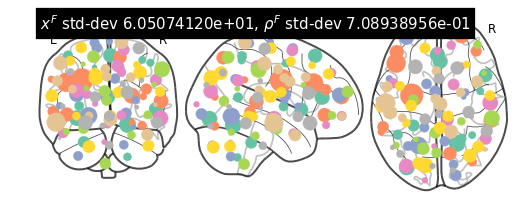

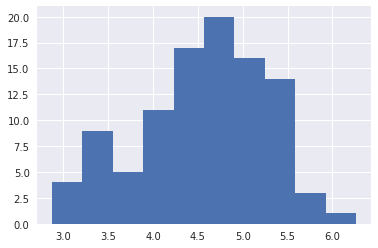

(<nilearn.plotting.displays.OrthoProjector at 0x7f27bdee3780>,
 tensor([[-33.0153, -82.8214,  -9.0126],
         [ 49.8958,  13.9978,   0.5908],
         [ -0.7281,  35.8034,  13.5295],
         [-14.5141, -34.6928,  44.3781],
         [ 20.1331, -53.4023, -49.7428],
         [ 35.7937, -48.9440,  52.2859],
         [-25.7208, -38.7584, -34.1881],
         [  2.0237,  28.4022,  57.1560],
         [-30.6216,  -4.8168,   3.8209],
         [ 24.5992, -52.7106,  13.4592],
         [ 19.9951, -57.8295, -15.8190],
         [ 44.2649,  -2.6042,  49.2864],
         [-42.3710, -48.4755,  56.7569],
         [ 12.3291, -68.3502,  55.1935],
         [-27.7223,  -6.8974,  31.1527],
         [-43.5480,  38.4482,  -5.1522],
         [ 24.6627,  56.0289,  14.5643],
         [ 36.8602, -76.9497,  13.7459],
         [ 40.0482,  39.5115,  21.6066],
         [-57.8521, -40.0883,  -2.0927],
         [ 25.2881,  23.6694, -13.8617],
         [-44.1239,  26.8226,  28.6007],
         [ 35.5839, -77.1680, -16.7

In [6]:
dtfa.visualize_factor_embedding()

In [7]:
losses = dtfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100)

01/21/2019 00:08:44 [Epoch 1] (52442ms) Posterior free-energy 1.48571942e+09 = KL from prior 8.57467440e+07 - log-likelihood -1.39997222e+09
01/21/2019 00:08:44 Saving checkpoint...
01/21/2019 00:09:37 [Epoch 2] (52963ms) Posterior free-energy 1.32797696e+09 = KL from prior 7.42633050e+06 - log-likelihood -1.32055066e+09
01/21/2019 00:10:29 [Epoch 3] (52674ms) Posterior free-energy 1.27026342e+09 = KL from prior 4.30224800e+06 - log-likelihood -1.26596083e+09
01/21/2019 00:11:21 [Epoch 4] (52038ms) Posterior free-energy 1.23341261e+09 = KL from prior 3.01744250e+06 - log-likelihood -1.23039514e+09
01/21/2019 00:12:14 [Epoch 5] (52827ms) Posterior free-energy 1.20874982e+09 = KL from prior 2.29404500e+06 - log-likelihood -1.20645632e+09
01/21/2019 00:13:05 [Epoch 6] (50950ms) Posterior free-energy 1.19278912e+09 = KL from prior 1.82768388e+06 - log-likelihood -1.19096166e+09
01/21/2019 00:13:58 [Epoch 7] (52472ms) Posterior free-energy 1.18052019e+09 = KL from prior 1.54724138e+06 - log

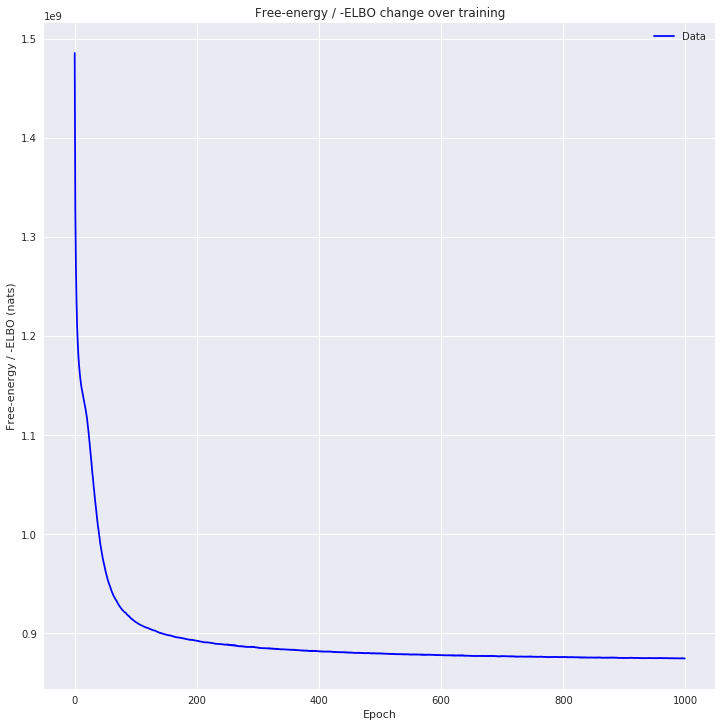

In [8]:
utils.plot_losses(losses)

In [9]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [10]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [11]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

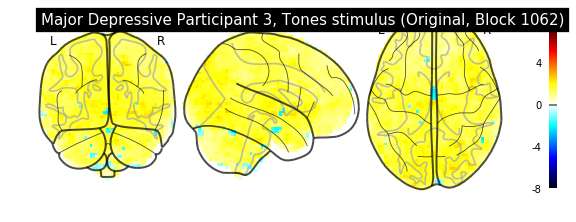

01/21/2019 14:30:24 Reconstruction Error (Frobenius Norm): 3.87426239e+02 out of 6.99515808e+02


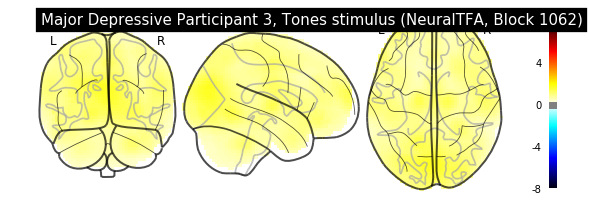

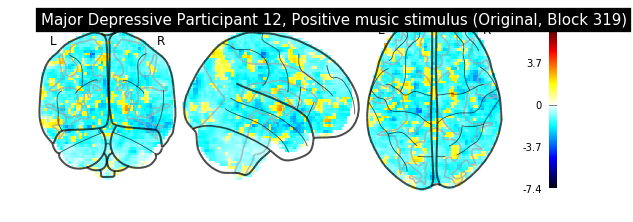

01/21/2019 14:30:28 Reconstruction Error (Frobenius Norm): 5.06302521e+02 out of 6.03930725e+02


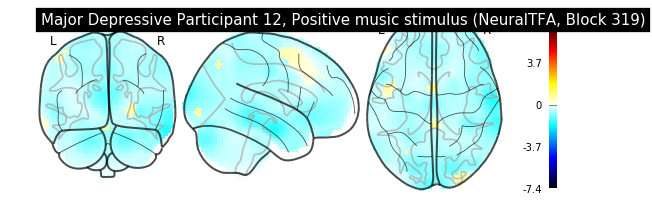

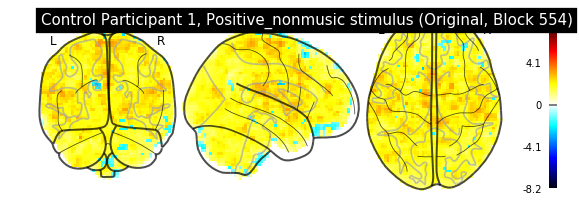

01/21/2019 14:30:32 Reconstruction Error (Frobenius Norm): 5.45426270e+02 out of 8.84992981e+02


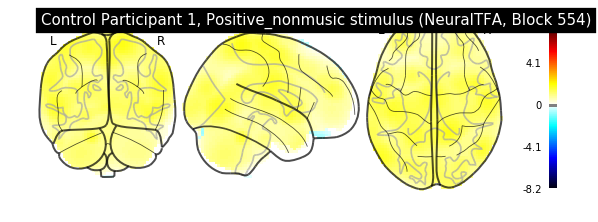

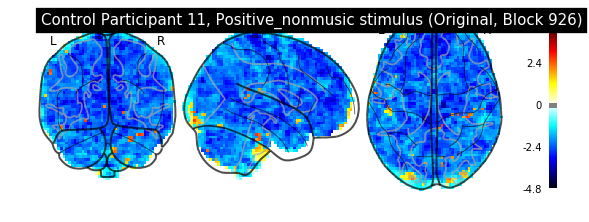

01/21/2019 14:30:37 Reconstruction Error (Frobenius Norm): 6.22438049e+02 out of 9.18257874e+02


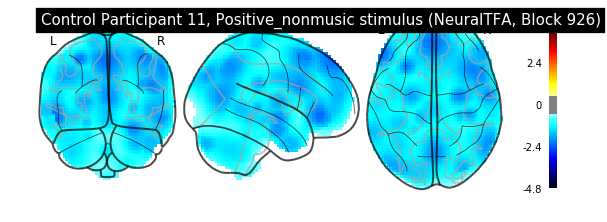

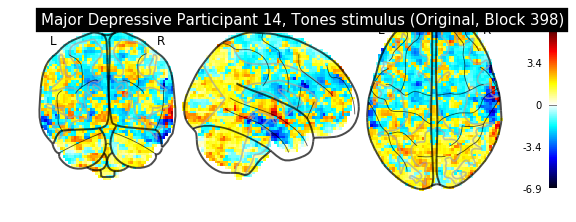

01/21/2019 14:30:41 Reconstruction Error (Frobenius Norm): 5.26648865e+02 out of 5.74846497e+02


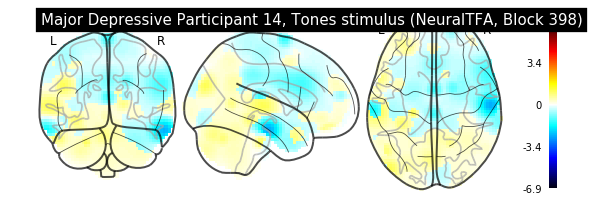

In [12]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


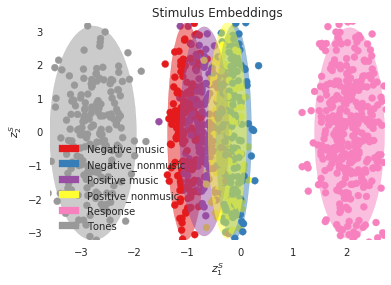

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


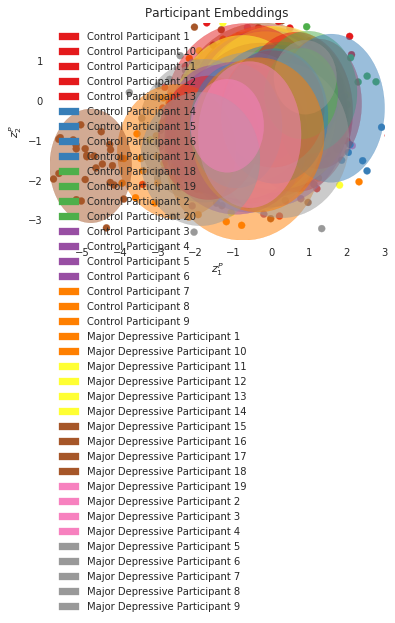

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

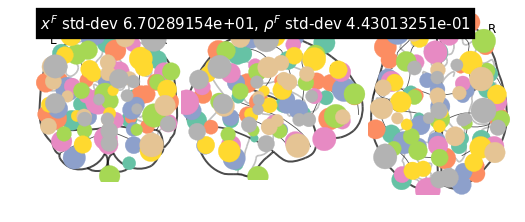

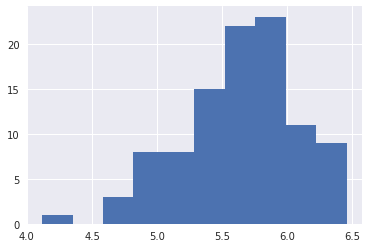

(<nilearn.plotting.displays.OrthoProjector at 0x7f27b058b7b8>,
 tensor([[-3.8403e+01, -9.6008e+01, -1.1272e+01],
         [ 5.4285e+01,  1.5469e+01, -4.6021e+00],
         [-1.5103e+00,  3.9851e+01,  1.3027e+01],
         [-2.0088e+01, -3.1049e+01,  4.0238e+01],
         [ 2.1939e+01, -5.4016e+01, -5.6481e+01],
         [ 4.5612e+01, -5.3407e+01,  5.7619e+01],
         [-2.4243e+01, -3.5489e+01, -2.9615e+01],
         [-8.5653e-01,  3.8080e+01,  7.0888e+01],
         [-2.8702e+01, -5.1188e+00,  5.6240e+00],
         [ 2.5589e+01, -5.2572e+01,  1.3962e+01],
         [ 2.1980e+01, -6.0305e+01, -1.0449e+01],
         [ 5.1766e+01, -1.6479e-01,  5.2371e+01],
         [-4.9251e+01, -4.7715e+01,  5.9286e+01],
         [ 7.4900e+00, -7.3404e+01,  6.2312e+01],
         [-2.2784e+01, -7.1372e+00,  3.0690e+01],
         [-5.5512e+01,  4.3684e+01, -9.2144e+00],
         [ 3.4204e+01,  6.9893e+01,  1.5284e+01],
         [ 4.0109e+01, -8.9440e+01,  1.6158e+01],
         [ 4.9986e+01,  4.4296e+01,  

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
dtfa.average_reconstruction_error()

01/21/2019 14:34:49 Average reconstruction error (MSE): 6.75037342e-01
01/21/2019 14:34:49 Average data norm (Euclidean): 9.63051352e-01
01/21/2019 14:34:49 Percent average reconstruction error: 0.274075


(0.6750373415497278, 0.9630513515838449, 0.0027407503707150734)

In [17]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


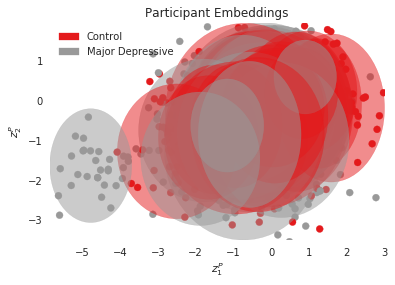

In [18]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)